In [27]:
# Import the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.impute import SimpleImputer

In [28]:
# LOAD the dataset

# Read the CSV file into a DataFrame
df = pd.read_csv('LengthOfStay.csv')

# Display the first few rows of the DataFrame
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [29]:
# Display first few rows
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [30]:
# Get dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [31]:
# Check for missing values
print(df.isnull().sum())

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64


In [32]:
# Check basic statistics
print(df.describe())

                 eid  dialysisrenalendstage         asthma        irondef  \
count  100000.000000          100000.000000  100000.000000  100000.000000   
mean    50000.500000               0.036420       0.035270       0.094940   
std     28867.657797               0.187334       0.184462       0.293134   
min         1.000000               0.000000       0.000000       0.000000   
25%     25000.750000               0.000000       0.000000       0.000000   
50%     50000.500000               0.000000       0.000000       0.000000   
75%     75000.250000               0.000000       0.000000       0.000000   
max    100000.000000               1.000000       1.000000       1.000000   

               pneum  substancedependence  psychologicaldisordermajor  \
count  100000.000000        100000.000000               100000.000000   
mean        0.039450             0.063060                    0.239040   
std         0.194664             0.243072                    0.426499   
min         0.

In [33]:
# 2. Classify Length of Stay into "Short", "Medium", and "Long" using qcut
df['lengthofstay_class'] = pd.qcut(df['lengthofstay'], q=3, labels=['Short', 'Medium', 'Long'])

In [34]:
from sklearn.preprocessing import LabelEncoder

# 3. Encode target labels into numeric format (0, 1, 2)
le_target = LabelEncoder()
df['lengthofstay_class'] = le_target.fit_transform(df['lengthofstay_class'])

In [35]:
# Convert 'vdate' and 'discharged' to datetime
df['vdate'] = pd.to_datetime(df['vdate'])
df['discharged'] = pd.to_datetime(df['discharged'])

In [36]:
# Handle the '5+' value in the 'rcount' column
df['rcount'] = df['rcount'].replace('5+', 5)  # You can replace with a different value if necessary
df['rcount'] = pd.to_numeric(df['rcount'], errors='coerce')  # Convert to numeric, invalid parsing will be set to NaN

# Check for any remaining missing values after conversion
print(df['rcount'].isnull().sum())

0


In [37]:
# 4. Encoding Categorical Features
from sklearn.preprocessing import StandardScaler, LabelEncoder
binary_columns = ['gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 
                  'substancedependence', 'psychologicaldisordermajor', 'depress', 
                  'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 
                  'secondarydiagnosisnonicd9']

le = LabelEncoder()

for col in binary_columns:
    df[col] = le.fit_transform(df[col])

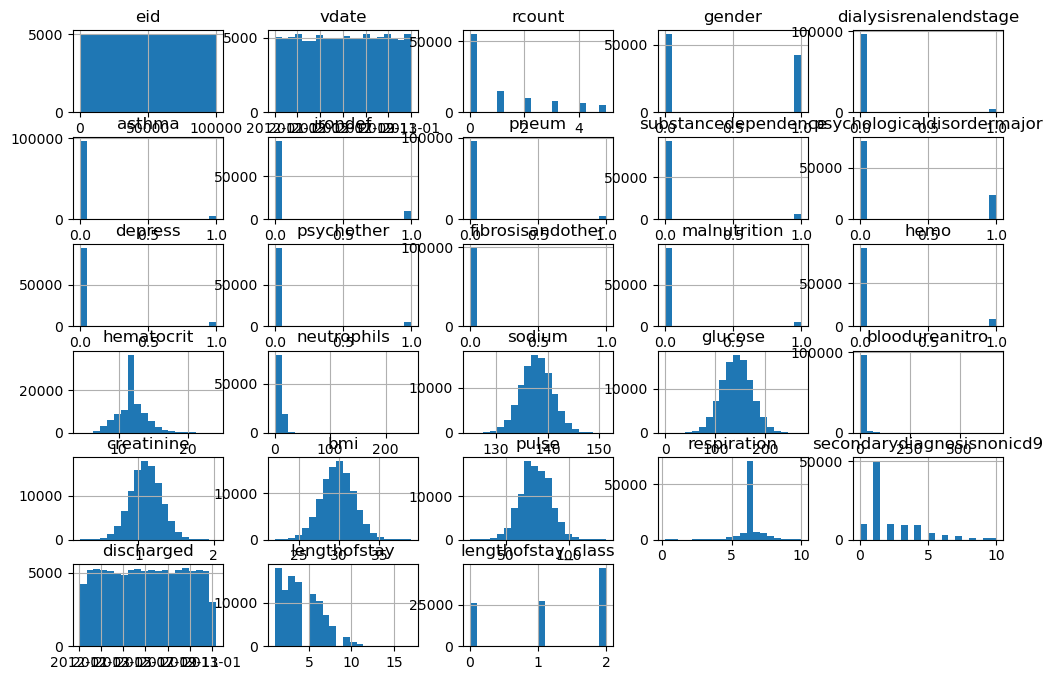

In [38]:
# Exploratory Data Analysis
# Histogram of numerical features
df.hist(figsize=(12, 8), bins=20)
plt.show()



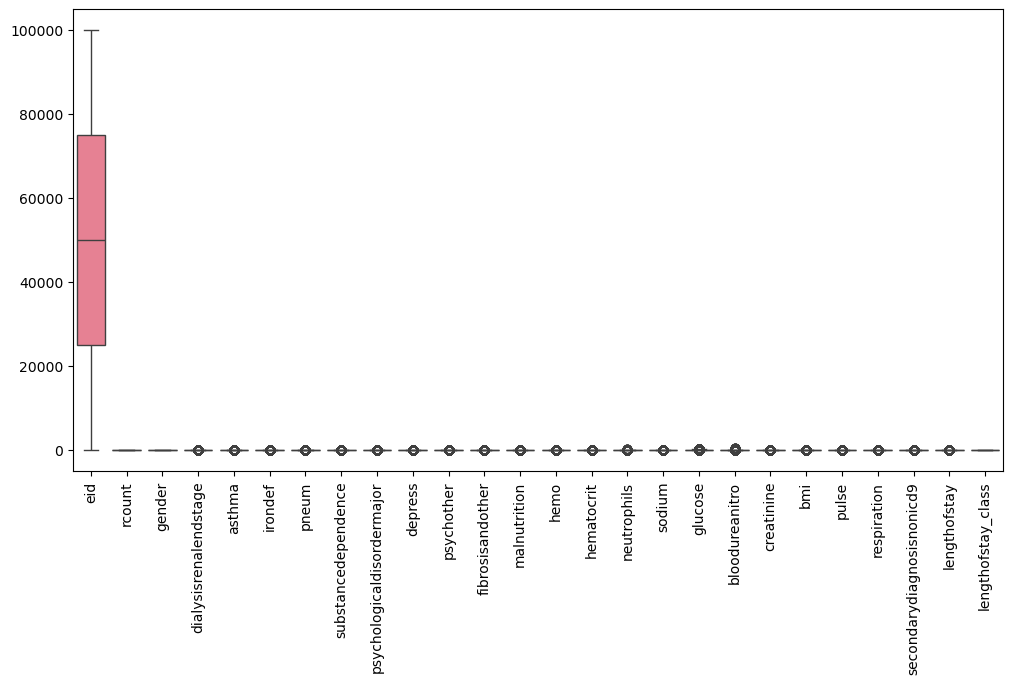

In [39]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

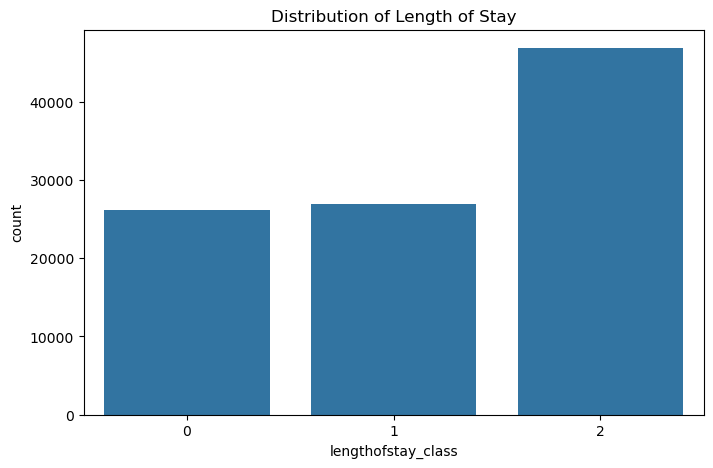

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['lengthofstay_class'])
plt.title("Distribution of Length of Stay")
plt.show()

C:\Users\asraf\AppData\Local\Temp\ipykernel_13920\861062642.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_stay['month_name'], y=monthly_avg_stay['lengthofstay'], palette='viridis')


<Axes: xlabel='month_name', ylabel='lengthofstay'>

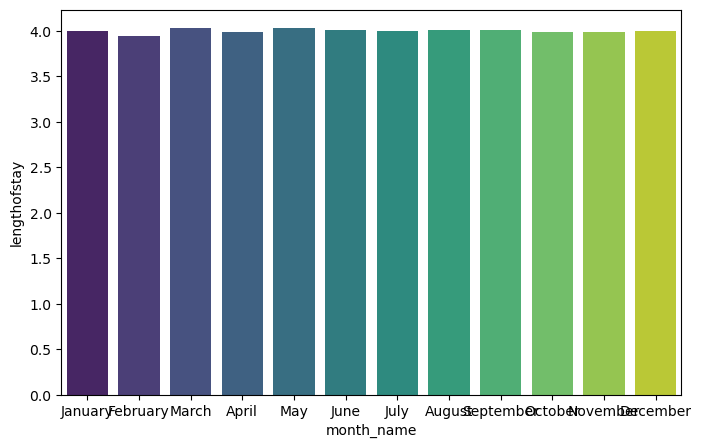

In [47]:
# Extract month as a new column
df['month'] = df['vdate'].dt.month
df['month_name'] = df['vdate'].dt.strftime('%B')  # Get month name

# Group by month and calculate the average length of stay
monthly_avg_stay = df.groupby('month_name')['lengthofstay'].mean().reset_index()

# Sort months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_stay['month_name'] = pd.Categorical(monthly_avg_stay['month_name'], categories=month_order, ordered=True)
monthly_avg_stay = monthly_avg_stay.sort_values('month_name')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg_stay['month_name'], y=monthly_avg_stay['lengthofstay'], palette='viridis')


C:\Users\asraf\AppData\Local\Temp\ipykernel_13920\2927305008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bmi['lengthofstay_class'], y=avg_bmi['bmi'], palette='viridis')


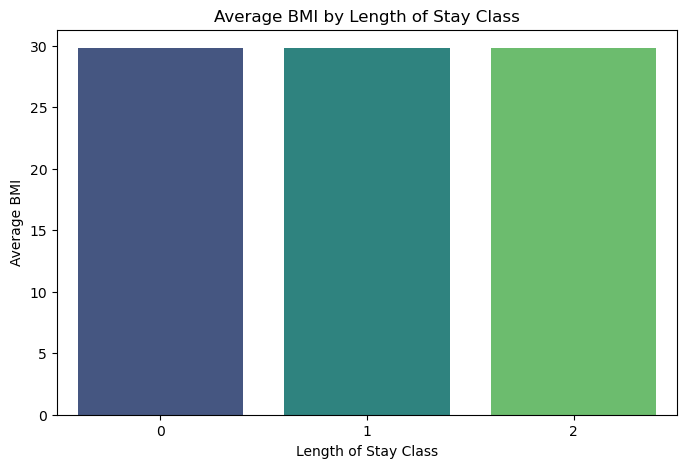

In [50]:
# Group by Length_of_stay_class and calculate the average BMI
avg_bmi = df.groupby('lengthofstay_class')['bmi'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_bmi['lengthofstay_class'], y=avg_bmi['bmi'], palette='viridis')

# Labels and title
plt.xlabel("Length of Stay Class")
plt.ylabel("Average BMI")
plt.title("Average BMI by Length of Stay Class")
plt.show()


In [52]:
# Group by Length_of_stay_class and calculate the average BMI
avg_glucose = df.groupby('lengthofstay_class')['glucose'].mean().reset_index()
print(avg_glucose)



   lengthofstay_class     glucose
0                   0  141.891154
1                   1  141.983662
2                   2  141.992089


In [53]:
df['asthma'].value_counts()

asthma
0    96473
1     3527
Name: count, dtype: int64

In [55]:
gen_asthma = df.groupby('gender')['asthma'].().reset_index()
print(gen_asthma)

   gender    asthma
0       0  0.045036
1       1  0.021980
